In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


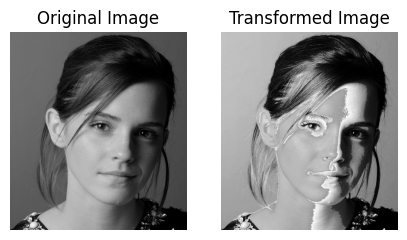

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Creating the LUT
t1 = np.linspace(0,50,51).astype("uint8")
t2 = np.linspace(100,255,100).astype("uint8")
t3 = np.linspace(151,255,105).astype("uint8")

# Concatenating the LUT parts
transform = np.concatenate((t1,t2),axis = 0).astype("uint8")
transform = np.concatenate((transform, t3), axis=0).astype("uint8")

# Read the image in grayscale
img = cv.imread("/content/gdrive/My Drive/a1images/emma.jpg",cv.IMREAD_GRAYSCALE)

# Apply the trasformation
img_trasformed = cv.LUT(img, transform)

# Display the results
fig , ax = plt.subplots(1,2,figsize=(5,5))

ax[0].imshow(img ,cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(img_trasformed, cmap='gray')
ax[1].set_title("Transformed Image")
ax[1].axis("off")

plt.show()







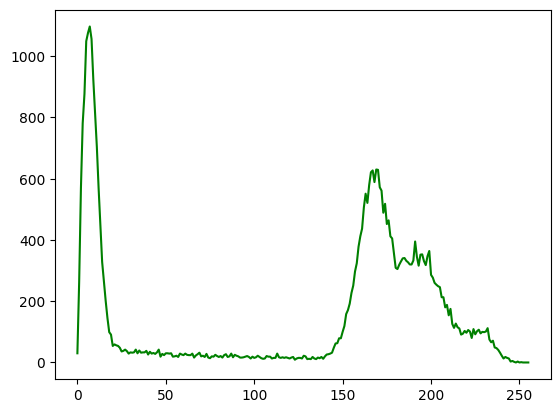

In [6]:
#Obtain the spectrogramm of an image

img = cv.imread("/content/gdrive/My Drive/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist , color='green')
plt.show()

Gray Matter Transfer Function: 256
White Matter Transfer Function: 256


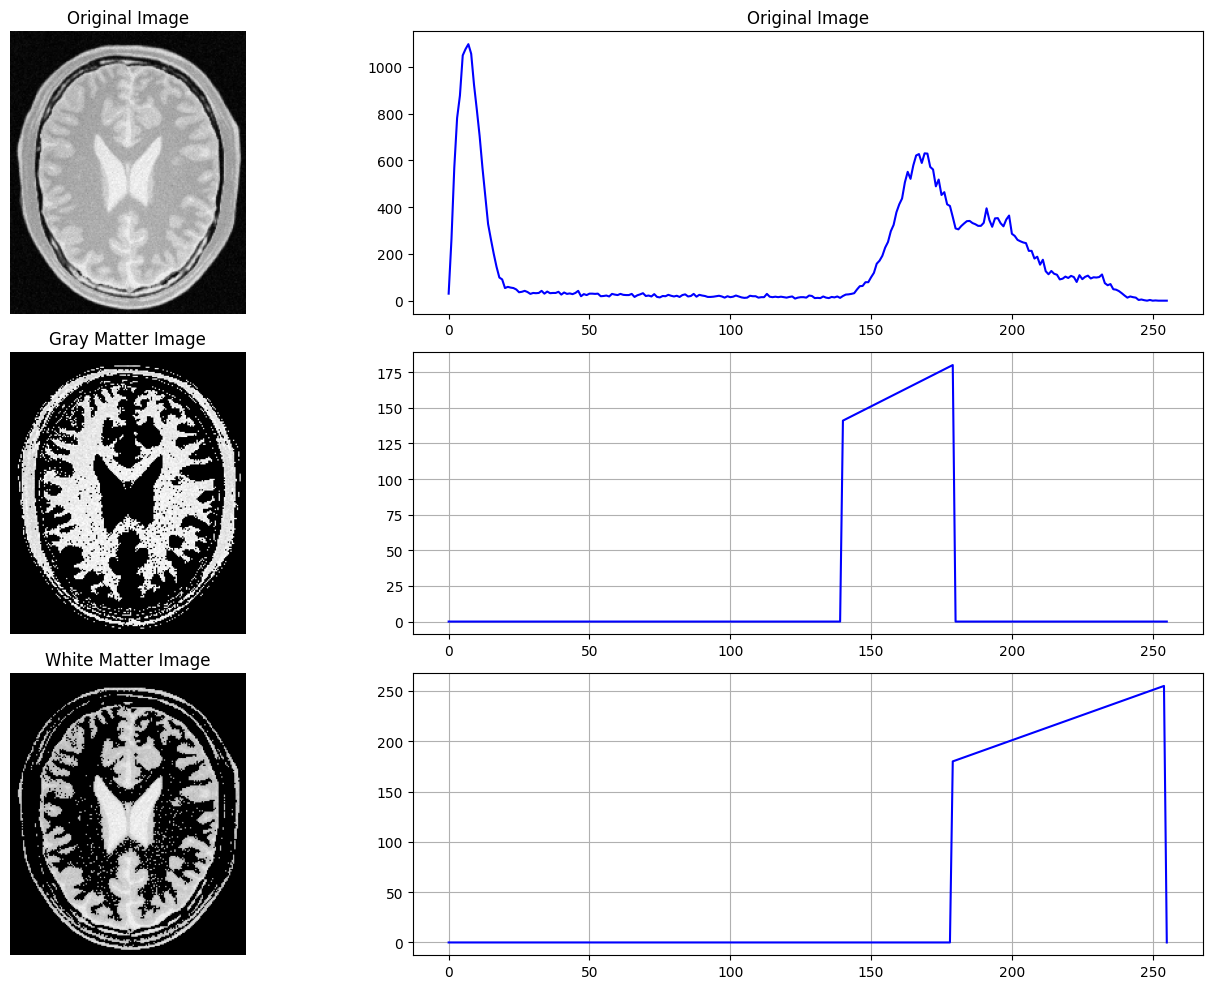

In [8]:

# To construct white matter trasfer function
t1 = np.linspace(180,256,77).astype("uint8")
t2 = np.zeros(179).astype("uint8")

# To create gray matter transfer function
t3 = np.zeros(140).astype("uint8")
t4 = np.zeros(76).astype("uint8")
t5 = np.linspace(141,180,40).astype("uint8")

# Creating the white maatter transfer function
whiteTf = np.concatenate((t2,t1),axis = 0).astype("uint8")


# Creating the gray matter transfer function
grayTf = np.concatenate((t3,t5),axis = 0).astype("uint8")
grayTf = np.concatenate((grayTf, t4), axis=0).astype("uint8")

print("Gray Matter Transfer Function:", len(grayTf))
print("White Matter Transfer Function:", len(whiteTf))


# Reading the image
img = cv.imread("/content/gdrive/My Drive/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)



# Apply grayTf transformation
gray_matter_image = cv.LUT(img, grayTf)

# Apply whiteTf transformation
white_matter_image = cv.LUT(img, whiteTf)

# Display the results
fig,ax = plt.subplots(3,2, figsize = (15,10))

# Display original image
ax[0][0].imshow(img, cmap='gray')
ax[0][0].set_title("Original Image")
ax[0][0].axis("off")
cv.imwrite("OriginalGrayImage.png",img)

ax[0][1].plot(hist, color = 'blue')
ax[0][1].set_title("Original Image")

# Display gray matter image
ax[1][0].imshow(gray_matter_image, cmap='gray')
ax[1][0].set_title("Gray Matter Image")
ax[1][0].axis("off")

ax[1][1].plot(grayTf,color='blue')
ax[1][1].grid()


# Display white matter image
ax[2][0].imshow(white_matter_image, cmap='gray')
ax[2][0].set_title("White Matter Image")
ax[2][0].axis("off")

ax[2][1].plot(whiteTf,color ='blue')
ax[2][1].grid()

plt.tight_layout()
plt.show()

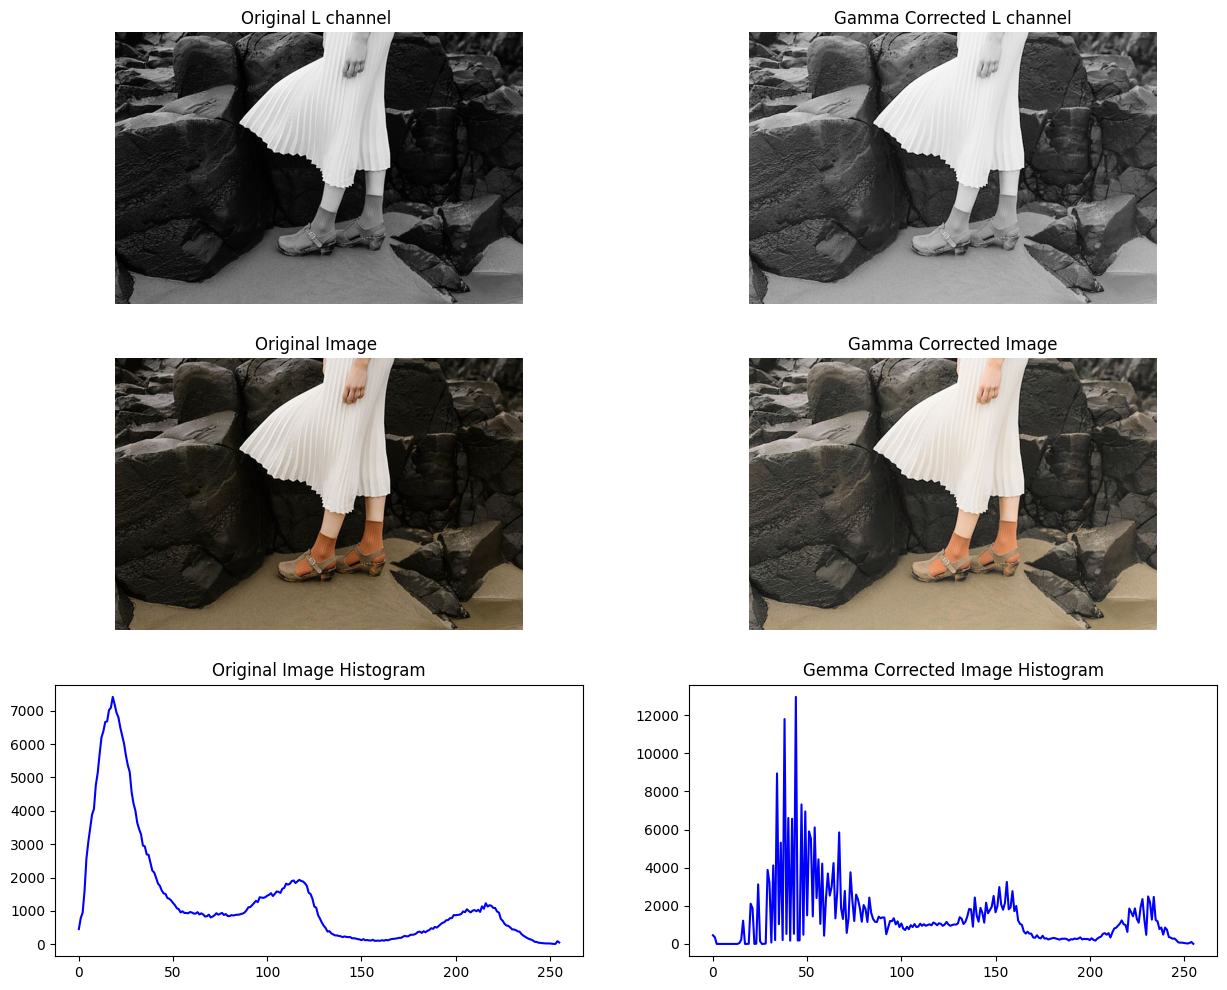

In [9]:
# Question 3
img = cv.imread("/content/gdrive/My Drive/a1images/highlights_and_shadows.jpg")
lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Extracting the L channel
imgL = lab[:,:,0]

# Constructing the gamma transfer function
gamma = 0.55
t = np.array([(i/255)**gamma*255 for i in range(256)]).astype(np.uint8)
imgGemmaCorrected = cv.LUT(imgL, t)

# Corrected Final image
totalCorrectedImage = lab.copy()
totalCorrectedImage[:,:,0] = imgGemmaCorrected
totalCorrectedImage = cv.cvtColor(totalCorrectedImage, cv.COLOR_LAB2RGB)


# Creating the histograms
grayOriginal = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
grayTotalCorrectedImage = cv.cvtColor(totalCorrectedImage, cv.COLOR_BGR2GRAY)

histL = cv.calcHist([grayOriginal], [0], None, [256], [0, 256])
histGemma = cv.calcHist([grayTotalCorrectedImage], [0], None, [256], [0, 256])


# Display the results
fig , ax = plt.subplots(3,2,figsize=(15,12))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



ax[0][0].imshow(imgL, cmap='gray')
ax[0][0].set_title("Original L channel ")
ax[0][0].axis("off")

ax[0][1].imshow(imgGemmaCorrected, cmap='gray')
ax[0][1].set_title("Gamma Corrected L channel")
ax[0][1].axis("off")
ax[1][0].imshow(img)
ax[1][0].set_title("Original Image ")
ax[1][0].axis("off")

ax[1][1].imshow(totalCorrectedImage)
ax[1][1].set_title("Gamma Corrected Image")
ax[1][1].axis("off")

ax[2][0].plot(histL, color='blue', label='Original L channel')
ax[2][0].set_title("Original Image Histogram")

ax[2][1].plot(histGemma, color='blue', label=' Gemma Corrected L channel')
ax[2][1].set_title("Gemma Corrected Image Histogram")

plt.show()


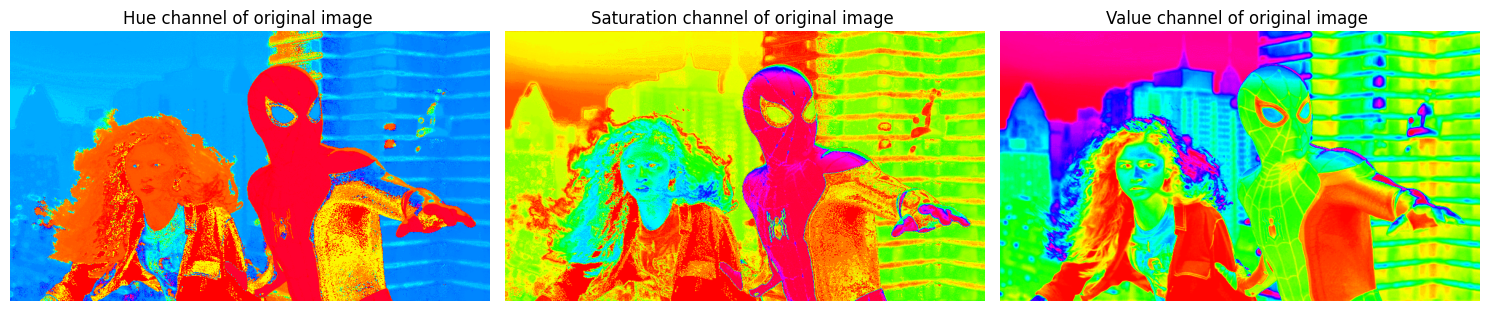

In [10]:
# Question 4

# Read the image
img = cv.imread("/content/gdrive/My Drive/a1images/spider.png")

# Convert the image to HSV color space
imghsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Split the HSV channels
hue = imghsv[:,:,0]
saturation = imghsv[:,:,1]
value = imghsv[:,:,2]

fig , ax = plt.subplots(1,3, figsize=(15,5))



ax[0].imshow(hue, cmap='hsv')
ax[0].set_title("Hue channel of original image ")
ax[0].axis("off")

ax[1].imshow(saturation, cmap='hsv')
ax[1].set_title("Saturation channel of original image ")
ax[1].axis("off")

ax[2].imshow(value, cmap='hsv')
ax[2].set_title("Value channel of original image ")
ax[2].axis("off")


plt.tight_layout()
plt.show()


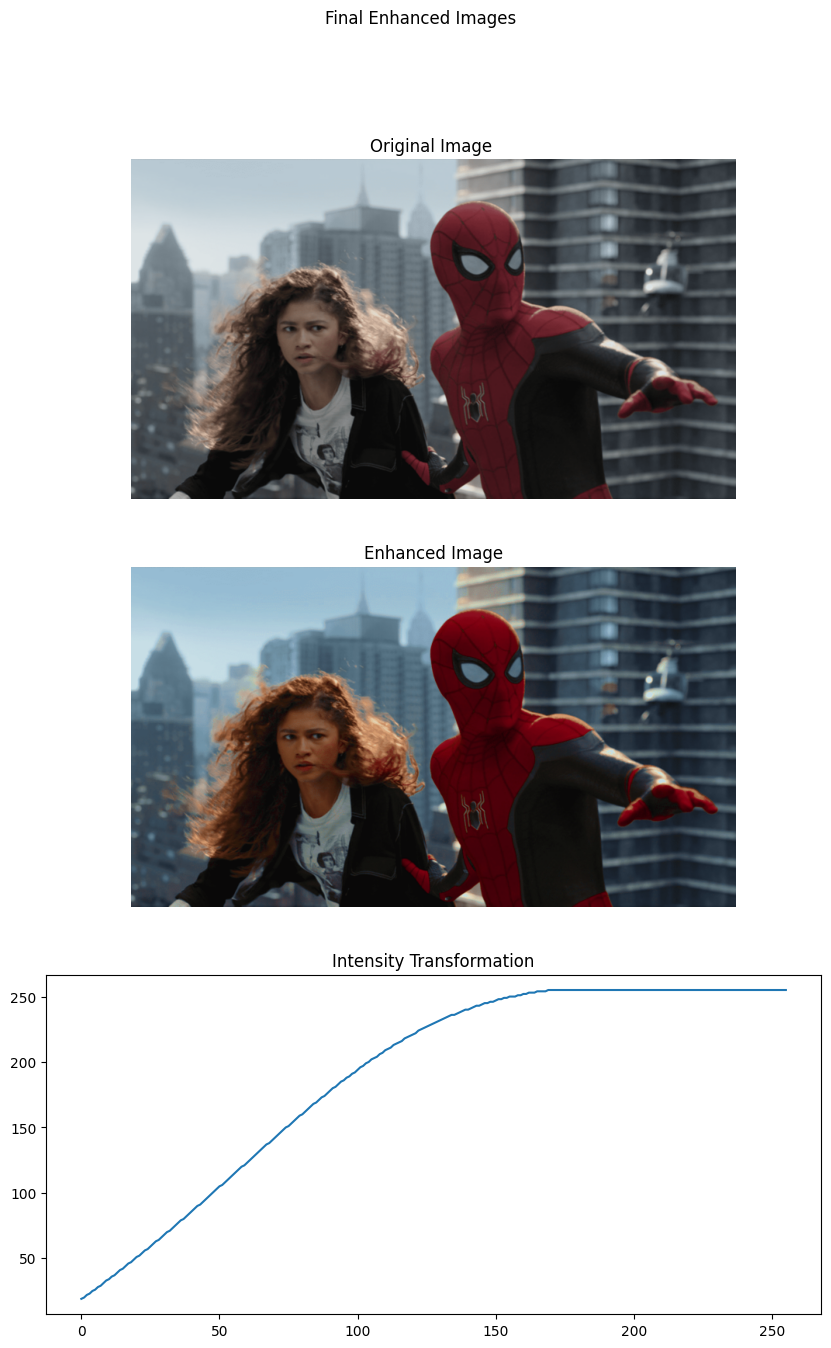

In [11]:
# Eqn
# f(x) = min(x + a*128*(exp(-1*(x-128)**2/(2*70**2))),255)

a = 0.8
t = np.array([min(x + a*128*(np.exp(-1*(x-128)**2/(2*70**2))),255) for x in range(256)]).astype("uint8")

# Applying the transformation to the Saturation channel
transformed_saturation = cv.LUT(saturation, t)

# Creating the enhanced HSV image combining the original hue and value channels with the transformed saturation channel
imghsvEnhanced = imghsv.copy()
imghsvEnhanced[:,:,1] = transformed_saturation

# Enhanced RGB image
enhancedRGB  = cv.cvtColor(imghsvEnhanced,cv.COLOR_HSV2RGB)


fig , ax = plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Final Enhanced Images")

ax[0].imshow(img)
ax[0].set_title("Original Image ")
ax[0].axis("off")

ax[1].imshow(enhancedRGB)
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

ax[2].plot(t)
ax[2].set_title("Intensity Transformation")



plt.show()




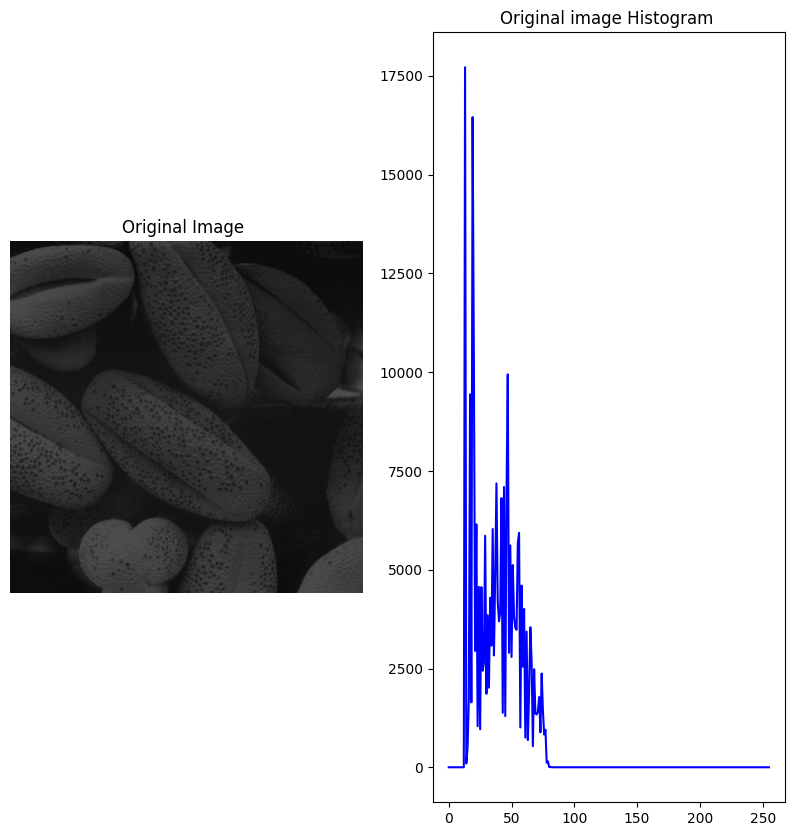

In [12]:
# Question 5

# Read the image
img = cv.imread("/content/gdrive/My Drive/a1images/shells.tif")
imgGray = cv.cvtColor(img,cv.COLOR_BGR2RGB)


def histEqualizer(img):
    # Dimensions of the image
    N = img.shape[1]
    M = img.shape[0]
    L = 2**8

    # Convert to grayscale
    imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Histrogram Calculation of original image
    imgHist = cv.calcHist([imgGray], [0], None, [256], [0, 256])

    # Cumilative sum of upto intensity k
    def cs(k):
        sum = 0
        for i in range(0 ,k+1):
            sum += imgHist[i]
        return sum

    # Histrogram Equilization Function
    t = np.array([(L-1)/(N * M)*cs(x) for x in range(256)]).astype('uint8')

    # Applying the Transformation
    imgHistEquilized = cv.LUT(imgGray,t)

    return imgHistEquilized



# Dimensions of the image
N = img.shape[1]
M = img.shape[0]
L = 2**8

# Histrogram Calculation of original image
imgHist = cv.calcHist([imgGray], [0], None, [256], [0, 256])

# Cumilative sum of upto intensity k
def cs(k):
    sum = 0
    for i in range(0 ,k+1):
        sum += imgHist[i]
    return sum

# Histrogram Equilization Function
t = np.array([(L-1)/(N * M)*cs(x) for x in range(256)]).astype('uint8')

# Applying the Transformation
imgHistEquilized = cv.LUT(imgGray,t)

# Histrogram Calculation of Equilized image
imgHistNew = cv.calcHist([imgHistEquilized], [0], None, [256], [0, 256])

# Plotting results

fig , ax = plt.subplots(1 , 2, figsize = (10,10))
ax[0].imshow(imgGray)
ax[0].set_title("Original Image ")
ax[0].axis("off")

ax[1].plot(imgHist , color ='blue')
ax[1].set_title("Original image Histogram ")

'''fig , ax = plt.subplots(2 , 2, figsize = (10,10))

ax[0][0].imshow(imgGray)
ax[0][0].set_title("Original Image ")
ax[0][0].axis("off")

ax[0][1].plot(imgHist , color ='blue')
ax[0][1].set_title("Original image Histogram ")

ax[1][0].imshow(imgHistEquilized, cmap='gray')
ax[1][0].set_title("Histrogram Equilized Image ")
ax[1][0].axis("off")

ax[1][1].plot(imgHistNew , color ='blue')
ax[1][1].set_title("Histrogram Equilized image Histogram ")'''

plt.show()


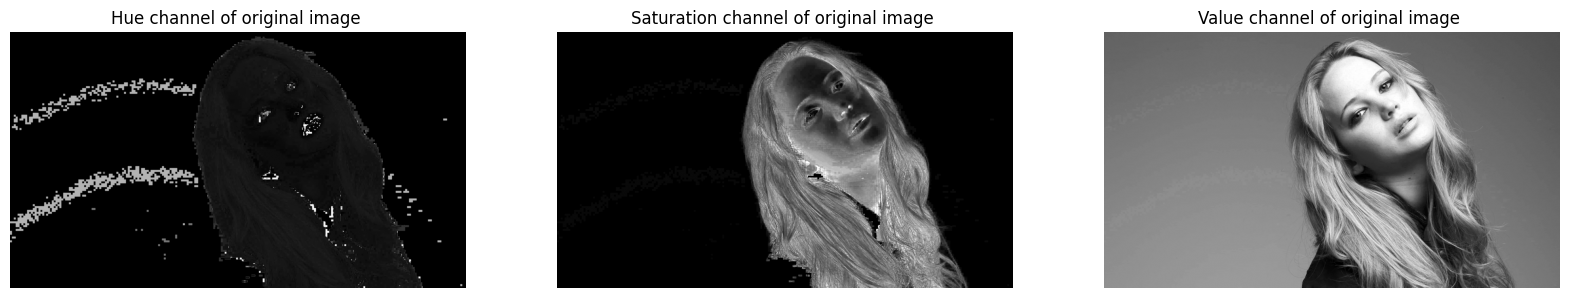

In [13]:
# Question 6


# Read the image
img = cv.imread("/content/gdrive/My Drive/a1images/jeniffer.jpg")

# Convert the image to HSV color space
imghsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

# Split the HSV channels
hue = imghsv[:,:,0]
saturation = imghsv[:,:,1]
value = imghsv[:,:,2]

# Histrogram Calculation of Saturation channel
imgHistNew = cv.calcHist([saturation], [0], None, [256], [0, 256])


fig , ax = plt.subplots(1,3, figsize=(20,20))


ax[0].imshow(hue, cmap='gray')
ax[0].set_title("Hue channel of original image ")
ax[0].axis("off")

ax[1].imshow(saturation, cmap='gray')
ax[1].set_title("Saturation channel of original image ")
ax[1].axis("off")

ax[2].imshow(value, cmap='gray')
ax[2].set_title("Value channel of original image ")
ax[2].axis("off")


plt.show()


Text(0.5, 1.0, 'Histrogram of the forground ')

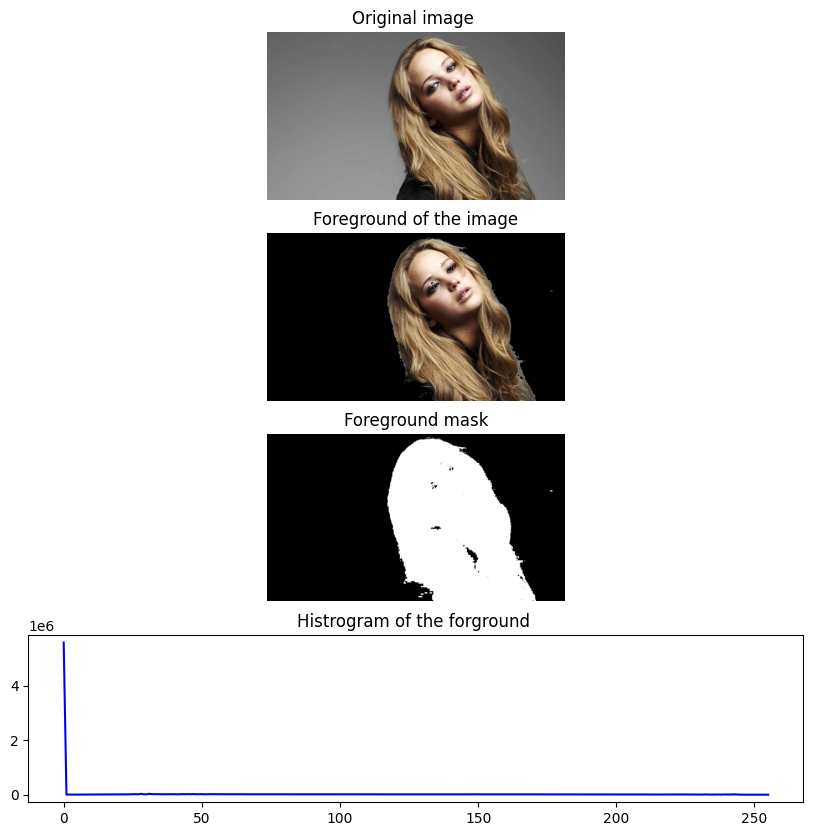

In [14]:
# Creating the binary mask
ret, mask = cv.threshold(saturation, 12 , 255, cv.THRESH_BINARY)

# Creating the masked image
masked_image = cv.bitwise_and(imghsv, imghsv, mask=mask)
masked_image = cv.cvtColor(masked_image,cv.COLOR_HSV2RGB)


# Calculate the image histogram
maskedGray = cv.cvtColor(masked_image,cv.COLOR_RGB2GRAY)
maskedHistrogram = cv.calcHist([maskedGray], [0], None, [256], [0, 256])


fig , ax = plt.subplots(4,1, figsize=(10,10))

ax[0].imshow(img)
ax[0].set_title("Original image ")
ax[0].axis("off")

ax[1].imshow(masked_image)
ax[1].set_title("Foreground of the image")
ax[1].axis("off")

ax[2].imshow(mask , cmap ='gray')
ax[2].set_title("Foreground mask")
ax[2].axis("off")


ax[3].plot(maskedHistrogram, color = 'blue')
ax[3].set_title("Histrogram of the forground ")




Text(0.5, 1.0, 'Equilized Histogram')

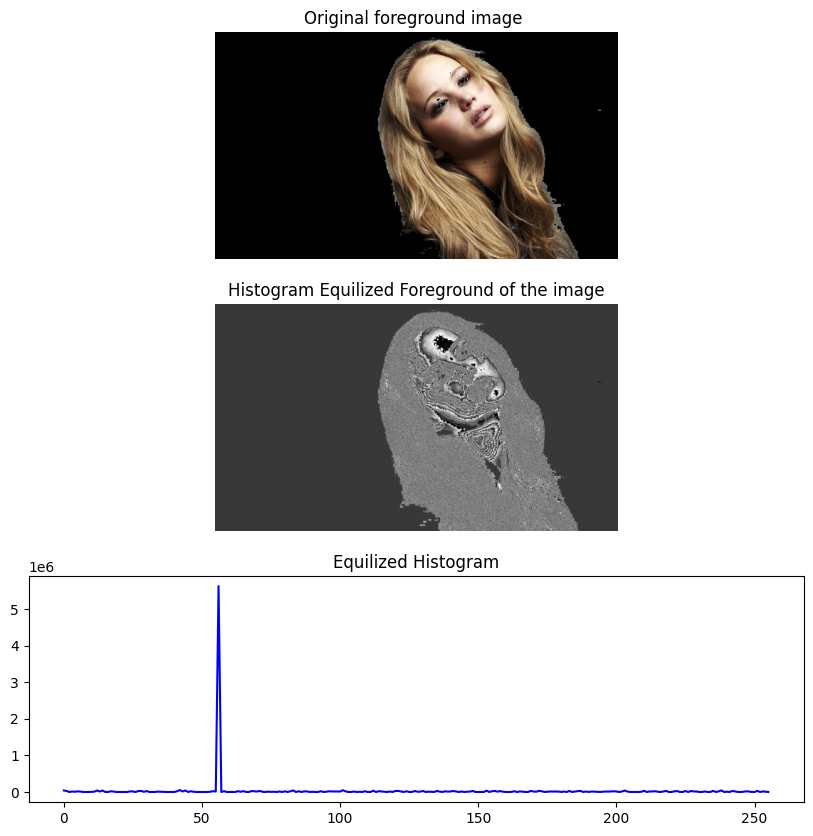

In [15]:
# Obtaining the cumulative sum
cumulativeSum = np.cumsum(maskedHistrogram)


# Transfer function
t = np.array([(L-1)/(N * M)*cumulativeSum[x] for x in range(256)]).astype('uint8')

# Apply the transformation
transformedImg = cv.LUT(maskedGray , t)

# Calculate the image histogram
EquilizedHist = cv.calcHist([transformedImg], [0], None, [256], [0, 256])


# Printing the results
fig , ax = plt.subplots(3,1, figsize=(10,10))

ax[0].imshow(masked_image)
ax[0].set_title("Original foreground image ")
ax[0].axis("off")

ax[1].imshow(transformedImg,cmap = 'gray')
ax[1].set_title("Histogram Equilized Foreground of the image")
ax[1].axis("off")

ax[2].plot(EquilizedHist, color = 'blue')
ax[2].set_title("Equilized Histogram")



In [ ]:
# Background Extraction


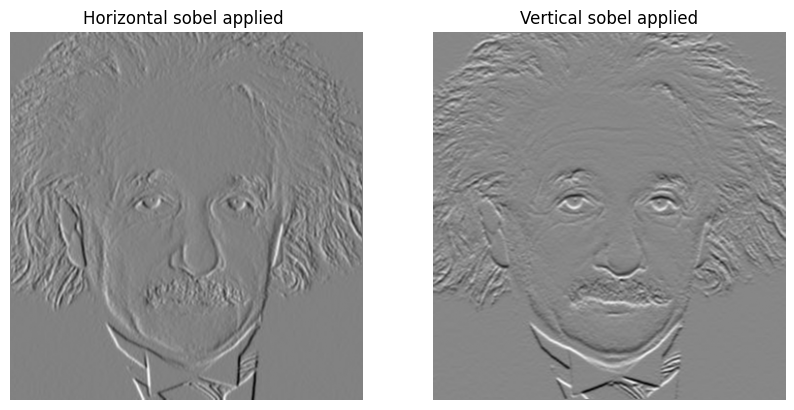

In [16]:
# Question 7

# Sobel X kernel (detects vertical edges)
kernel_sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Sobel Y kernel (detects horizontal edges)
kernel_sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Read image in grayscale
image = cv.imread('/content/gdrive/My Drive/a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Apply custom Sobel kernels using filter2D
sobel_x_custom = cv.filter2D(image,cv.CV_64F, kernel_sobel_x)
sobel_y_custom = cv.filter2D(image, cv.CV_64F, kernel_sobel_y)

# Convert to absolute values and scale to 8-bit
#sobel_x_abs = cv.convertScaleAbs(sobel_x_custom)
#sobel_y_abs = cv.convertScaleAbs(sobel_y_custom)

# Display Results
fig , ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(sobel_x_custom,cmap = 'gray')
ax[0].set_title("Horizontal sobel applied ")
ax[0].axis("off")

ax[1].imshow(sobel_y_custom,cmap = 'gray')
ax[1].set_title("Vertical sobel applied")
ax[1].axis("off")

plt.show()


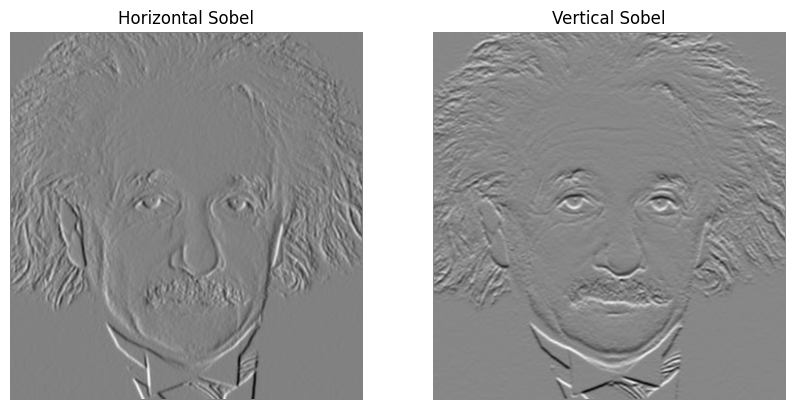

In [17]:
# Load the image in grayscale
image = cv.imread('/content/gdrive/My Drive/a1images/einstein.png', cv.IMREAD_GRAYSCALE)
height, width = image.shape

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# Initialize output arrays
gradient_x = np.zeros((height, width), dtype=np.float32)
gradient_y = np.zeros((height, width), dtype=np.float32)

# Manual convolution for Sobel filter
def convolve(image, kernel, height, width):
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    output = np.zeros((height, width), dtype=np.float32)

    # Iterate over each pixel
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            # Compute convolution for the current pixel
            sum_val = 0
            for ki in range(-pad, pad + 1):
                for kj in range(-pad, pad + 1):
                    sum_val += image[i + ki, j + kj] * kernel[ki + pad, kj + pad]
            output[i, j] = sum_val

    return output

# Apply Sobel filters
gradient_x = convolve(image, sobel_x, height, width)
gradient_y = convolve(image, sobel_y, height, width)


# Convert to absolute values and scale to 8-bit
#gradient_x = cv.convertScaleAbs(gradient_x)
#gradient_y = cv.convertScaleAbs(gradient_y)

# Create a figure to display images
fig , ax  = plt.subplots(1,2,figsize=(10,10))


# Display horizontal Sobel (gradient_x)

ax[0].imshow(gradient_x, cmap='gray')
ax[0].set_title('Horizontal Sobel')
ax[0].axis('off')

# Display vertical Sobel (gradient_y)
ax[1].imshow(gradient_y, cmap='gray')
ax[1].set_title('Vertical Sobel')
ax[1].axis('off')

# Show the figure
plt.show()


(np.float64(-0.5), np.float64(363.5), np.float64(379.5), np.float64(-0.5))

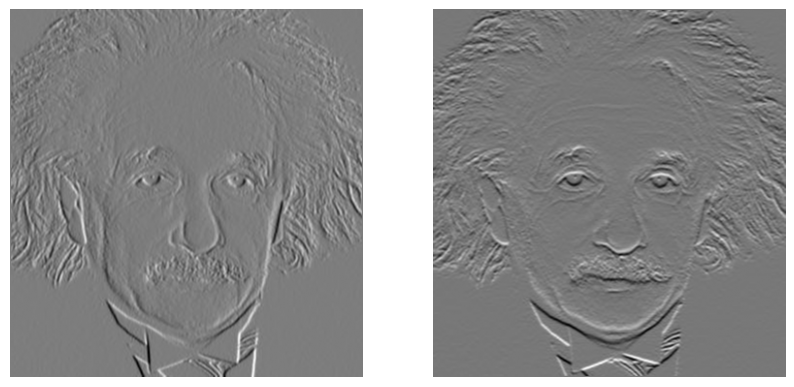

In [18]:
# Read the image
image = cv.imread('/content/gdrive/My Drive/a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Decomposed matrices of the horizontal sobel kernal
kernel_sobel_x1 = np.array([[1],[2],[1]], dtype=np.float32)
kernel_sobel_x2 = np.array([[1,0,-1]], dtype=np.float32)


# Decomposed matrices of the vertical sobel kernal
kernel_sobel_y1 = np.array([[1],[0],[-1]], dtype=np.float32)
kernel_sobel_y2 = np.array([[1,2,1]], dtype=np.float32)

# Applying the sobel horizontal filter
sobel_x_custom = cv.filter2D(image,cv.CV_64F, kernel_sobel_x1)
sobel_x_custom = cv.filter2D(sobel_x_custom,cv.CV_64F, kernel_sobel_x2)

# Applying the sobel horizontal filter
sobel_y_custom = cv.filter2D(image,cv.CV_64F, kernel_sobel_y1)
sobel_y_custom = cv.filter2D(sobel_y_custom,cv.CV_64F, kernel_sobel_y2)

# Converting into the 8-bit value
#sobel_x_abs = cv.convertScaleAbs(sobel_x_custom)
#sobel_y_abs = cv.convertScaleAbs(sobel_y_custom)


fig , ax = plt.subplots(1,2 , figsize =(10,6))

ax[0].imshow(sobel_x_custom,cmap = 'gray')
ax[0].axis("off")

ax[1].imshow(sobel_y_custom,cmap = 'gray')
ax[1].axis("off")





Image 1 - Nearest-Neighbor SSD: 137.2096
Image 1 - Bilinear SSD: 201.4493


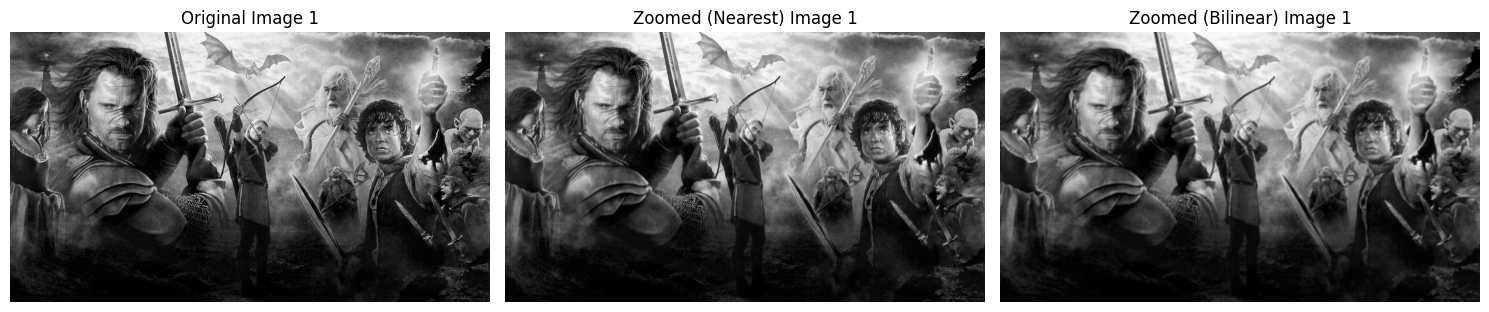

In [19]:
def zoom_image(image, scale_factor, method='nearest'):
    """
    Zoom an image by a given scale factor using specified interpolation method.

    Parameters:
    - image: Input image (grayscale, numpy array)
    - scale_factor: Zoom factor s in (0, 10]
    - method: 'nearest' for nearest-neighbor or 'bilinear' for bilinear interpolation

    Returns:
    - Zoomed image as a numpy array
    """
    if scale_factor <= 0 or scale_factor > 10:
        raise ValueError("Scale factor must be in (0, 10]")

    height, width = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    zoomed = np.zeros((new_height, new_width), dtype=np.float32)

    # Compute scaling ratios
    x_ratio = width / new_width
    y_ratio = height / new_height

    if method == 'nearest':
        # Nearest-neighbor interpolation
        for i in range(new_height):
            for j in range(new_width):
                # Find the nearest pixel in the original image
                x = int(j * x_ratio)
                y = int(i * y_ratio)
                zoomed[i, j] = image[y, x]

    elif method == 'bilinear':
        # Bilinear interpolation
        for i in range(new_height):
            for j in range(new_width):
                # Map to original image coordinates
                x = j * x_ratio
                y = i * y_ratio
                x0 = int(x)
                y0 = int(y)
                x1 = min(x0 + 1, width - 1)
                y1 = min(y0 + 1, height - 1)

                # Fractional parts
                dx = x - x0
                dy = y - y0

                # Bilinear interpolation
                f00 = image[y0, x0]
                f01 = image[y0, x1]
                f10 = image[y1, x0]
                f11 = image[y1, x1]

                # Compute weighted average
                zoomed[i, j] = (1 - dx) * (1 - dy) * f00 + dx * (1 - dy) * f01 + \
                               (1 - dx) * dy * f10 + dx * dy * f11

    else:
        raise ValueError("Method must be 'nearest' or 'bilinear'")

    return zoomed.astype(np.uint8)

def compute_normalized_ssd(original, zoomed):
    """
    Compute normalized sum of squared differences between two images.

    Parameters:
    - original: Original image
    - zoomed: Zoomed image

    Returns:
    - Normalized SSD value
    """
    if original.shape != zoomed.shape:
        raise ValueError("Images must have the same dimensions")
    diff = original.astype(np.float32) - zoomed.astype(np.float32)
    ssd = np.sum(diff ** 2)
    return ssd / (original.shape[0] * original.shape[1])

# Load images (assuming grayscale for simplicity)
original1 = cv.imread('/content/gdrive/My Drive/a1images/a1q5images/im01.png', cv.IMREAD_GRAYSCALE)
small1 = cv.imread('/content/gdrive/My Drive/a1images/a1q5images/im01small.png', cv.IMREAD_GRAYSCALE)
scale_factor = 4.0

# Apply zooming with nearest-neighbor
zoomed1_nearest = zoom_image(small1, scale_factor, method='nearest')


# Apply zooming with bilinear interpolation
zoomed1_bilinear = zoom_image(small1, scale_factor, method='bilinear')

# Compute normalized SSD
ssd1_nearest = compute_normalized_ssd(original1, zoomed1_nearest)
ssd1_bilinear = compute_normalized_ssd(original1, zoomed1_bilinear)

# Print SSD results
print(f"Image 1 - Nearest-Neighbor SSD: {ssd1_nearest:.4f}")
print(f"Image 1 - Bilinear SSD: {ssd1_bilinear:.4f}")

# Visualize results for Image 1
plt.figure(figsize=(15, 15))

plt.subplot(2, 3, 1)
plt.imshow(original1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(zoomed1_nearest, cmap='gray')
plt.title('Zoomed (Nearest) Image 1')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(zoomed1_bilinear, cmap='gray')
plt.title('Zoomed (Bilinear) Image 1')
plt.axis('off')


plt.tight_layout()
plt.show()


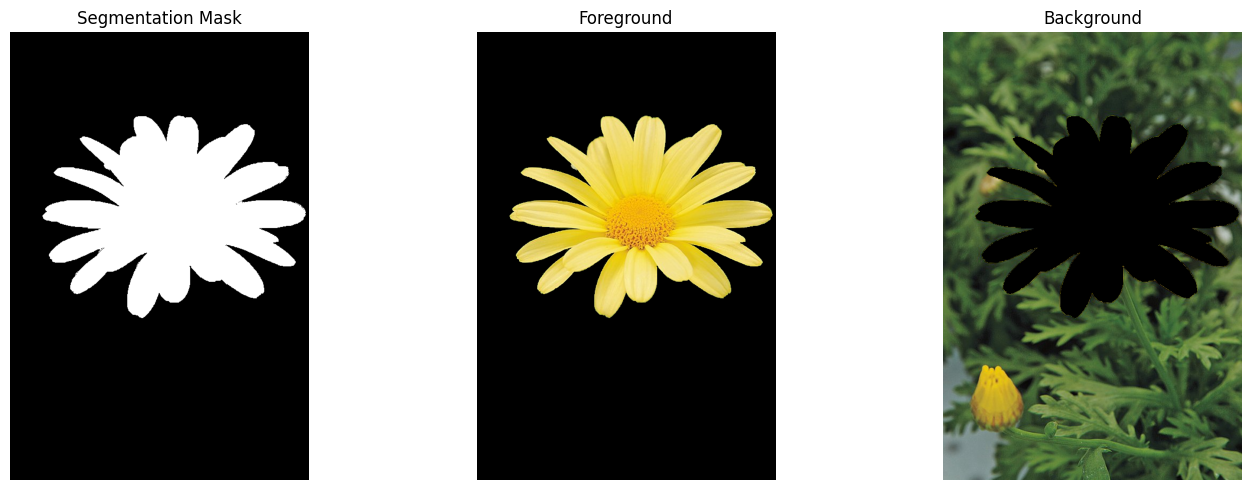

In [23]:
def grabcut_segmentation(img_path, rect=None, iter=5):
    """
    Perform GrabCut segmentation and return results
    Args:
        img_path: Path to input image
        rect: (x,y,w,h) rectangle for ROI (if None, user needs to draw)
        iter: Number of GrabCut iterations
    Returns:
        mask: Segmentation mask
        foreground: Foreground image
        background: Background image
    """
    # Read image
    imgN = cv.imread(img_path)
    imgN= cv.cvtColor(imgN, cv.COLOR_BGR2RGB)
    h, w = imgN.shape[:2]

    # Initialize mask and background model
    mask = np.zeros(imgN.shape[:2], np.uint8)
    bgd_model = np.zeros((1,65), np.float64)
    fgd_model = np.zeros((1,65), np.float64)

    # If no rectangle provided, use the entire image (with padding)
    if rect is None:
        rect = (int(w*0.1), int(h*0.1), int(w*0.9), int(h*0.9))

    # Apply GrabCut
    cv.grabCut(imgN, mask, rect, bgd_model, fgd_model, iter, cv.GC_INIT_WITH_RECT)

    # Create final mask
    mask_final = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

    # Extract foreground and background
    foreground = imgN * mask_final[:,:,np.newaxis]
    background = imgN * (1 - mask_final[:,:,np.newaxis])

    return mask_final, foreground, background


img_path = '/content/gdrive/My Drive/a1images/daisy.jpg'  # Replace with your image path
img = cv.imread(img_path)
h, w = img.shape[:2]
# Converting Colors
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

mask, foreground, background = grabcut_segmentation(img_path, rect = (int(w*0.1), int(h*0.1), int(w*0.9), int(h*0.6)))

# Display results
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(foreground)
plt.title('Foreground')
plt.axis('off')

plt.subplot(133)
plt.imshow(background)
plt.title('Background')
plt.axis('off')

plt.tight_layout()
plt.show()

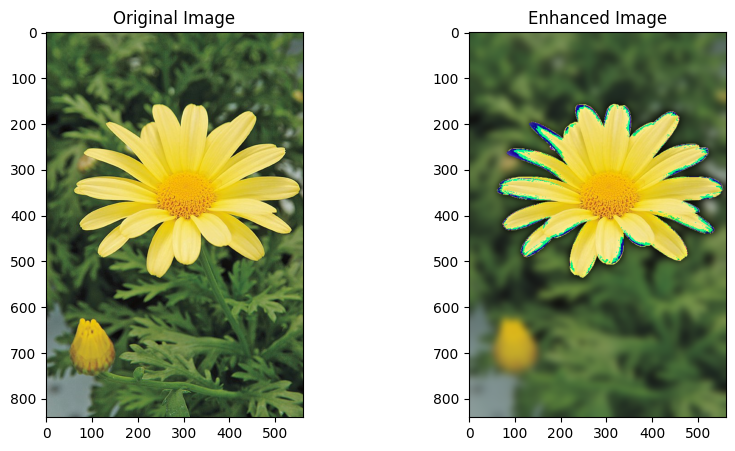

In [24]:
# Create blurred background
blurred_bg = cv.GaussianBlur(background, (51,51), 0)

# Combine with original foreground
enhanced = foreground + blurred_bg



# Display comparison
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(enhanced), plt.title('Enhanced Image')
plt.show()